In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd

In [2]:
master = pd.ExcelFile("CONTE_TWIN_CT_SA_tlaplace_Master.xlsx") 

In [3]:
master.sheet_names

[u'ROIs',
 u'1_2_CONTE_CT_tlaplace_dROI',
 u'1_2_CONTE_SA_dROI',
 u'1_2_CONTE_TotalCT_SA',
 u'1_2_TWIN_CT_tlaplace_dROI',
 u'1_2_TWIN_SA_dROI',
 u'1_2_TWIN_TotalCT_SA',
 u'4_6_CONTE_CT_tlaplace_dROI',
 u'4_6_CONTE_SA_dROI',
 u'4_6_CONTE_TotalCT_SA',
 u'4_6_TWIN_CT_tlaplace_dROI',
 u'4_6_TWIN_SA_dROI',
 u'4_6_TWIN_TotalCT_SA']

In [4]:
ct1_2y = master.parse('1_2_TWIN_CT_tlaplace_dROI')
#ct1_2_twin = master.parse('1_2_TWIN_CT_tlaplace_dROI')
ct4_6y = master.parse('4_6_TWIN_CT_tlaplace_dROI')
#ct4_6_twin = master.parse('4_6_TWIN_CT_tlaplace_dROI')

In [5]:
ct1_2y.rename(columns={'ROI':'SubjectId'},inplace=True)
ct4_6y.rename(columns={'ROI':'SubjectId'},inplace=True)

# There is probably a better way to add the age column to each record based off the recordId
ct1y = ct1_2y.loc[ct1_2y['SubjectId'].str.contains("1yr"),:]
ones = pd.DataFrame(data=[1] * ct1y.shape[0], columns=["Age"])
ct1y = pd.concat([ct1y, ones] ,axis=1).dropna()
     
ct2y = ct1_2y.loc[ct1_2y['SubjectId'].str.contains("2yr"),:]
twos = pd.DataFrame(data=[2] * ct2y.shape[0], columns=["Age"])
ct2y = pd.concat([ct2y, twos] ,axis=1).dropna()

ct4y = ct4_6y.loc[ct4_6y['SubjectId'].str.contains("4yr"),:]
fours = pd.DataFrame(data=[4] * ct4y.shape[0], columns=["Age"])
ct4y = pd.concat([ct4y, fours] ,axis=1).dropna()

ct6y = ct4_6y.loc[ct4_6y['SubjectId'].str.contains("6yr"),:]
sixes = pd.DataFrame(data=[6] * ct6y.shape[0], columns=["Age"])
ct6y = pd.concat([ct6y, sixes] ,axis=1).dropna()

# Combine dataframe
ctdf = pd.concat([ct1y, ct2y, ct4y, ct6y], axis=0)
ctdf.head()

,SubjectId,11101,11102,11103,11104,11105,11106,11107,11108,11109,...,12167,12168,12169,12170,12171,12172,12173,12174,12175,Age
3,T0008-1-1-1yr,3.486494,2.856641,2.716897,3.004466,3.637363,3.997624,3.294925,3.526007,3.754828,...,2.695124,2.862933,2.923188,2.764379,3.911163,3.171072,3.594310,3.032033,2.707097,1.0
5,T0008-1-2-1yr,3.803053,2.813503,2.809339,3.000443,3.877554,3.668726,3.324858,3.098699,3.324709,...,3.201557,2.788938,2.786511,2.719444,3.986856,3.156586,3.543744,3.084973,2.878470,1.0
7,T0008-2-1-1yr,3.862899,3.617559,2.618064,2.990563,3.790259,3.591290,2.946180,3.210544,3.520958,...,3.070906,2.734510,2.839068,2.882515,3.632501,3.060968,3.774961,3.096564,2.584671,1.0
9,T0008-2-2-1yr,4.320036,3.117687,2.527040,2.915388,4.123611,3.354899,2.824552,2.964867,3.977841,...,2.970773,2.593202,2.605974,2.558969,4.110362,3.040926,3.804661,2.964910,2.718638,1.0
12,T0011-1-1-1yr,4.348756,3.110457,2.999257,3.264470,3.814596,3.792389,3.149425,3.072583,3.401267,...,3.349061,2.945597,2.856788,2.813908,4.304579,2.984865,3.263392,2.870364,2.888656,1.0


In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [7]:
# standardize values for PCA
x = ctdf.loc[:, ~ctdf.columns.isin(['SubjectId', 'Age'])]
x = StandardScaler().fit_transform(x)
x.shape

features = ctdf.drop(['SubjectId', 'Age'], axis=1)

In [8]:
pca = PCA(n_components=150)
pca.fit(x)

pca

PCA(copy=True, n_components=150, whiten=False)

In [9]:
pcs = []
for i in range(1,151):
    pcs.append('PC' + str(i))
principalComponentDf = pd.DataFrame(data = np.transpose(pca.components_), columns = pcs)
columnNames = pd.DataFrame(data = ctdf.columns.values.tolist()[1:], columns = ['ROI'])
principalComponentDf = pd.concat([columnNames, principalComponentDf], axis=1)
# why does the dataframe have 151 rows?
principalComponentDf.head()

,ROI,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC141,PC142,PC143,PC144,PC145,PC146,PC147,PC148,PC149,PC150
0,11101,0.073144,-0.192182,0.084019,-0.096021,0.045537,-0.007815,0.008076,-0.051975,-0.053779,...,-0.163105,-0.048396,-0.052756,0.137995,0.437241,-0.047780,-0.104635,0.317933,-0.150369,0.208565
1,11102,0.085604,-0.077367,0.060552,-0.169061,0.105711,-0.039750,0.022061,-0.094151,0.053666,...,-0.168966,-0.108875,-0.146394,0.005174,0.035784,-0.109498,0.045592,-0.009831,0.086925,0.022106
2,11103,0.061035,0.065516,-0.084109,-0.085498,0.064124,0.188441,0.052492,0.030883,-0.071001,...,-0.119839,0.034719,0.013633,-0.047488,-0.037963,-0.029818,0.055001,-0.031860,-0.005778,0.007763
3,11104,0.096959,-0.037588,-0.114558,-0.012791,-0.050828,0.062558,-0.164355,0.032068,0.072486,...,-0.034263,0.012767,0.026882,-0.085583,-0.008477,0.019868,0.061040,-0.020226,0.009932,-0.000477
4,11105,0.085796,-0.159097,0.050016,-0.093380,0.087688,0.005678,0.020570,-0.079023,-0.055665,...,-0.220822,-0.012186,-0.021493,-0.027908,-0.287384,0.213641,0.087556,-0.143409,-0.012390,-0.126110


Text(0.5,0,'Principal Component')

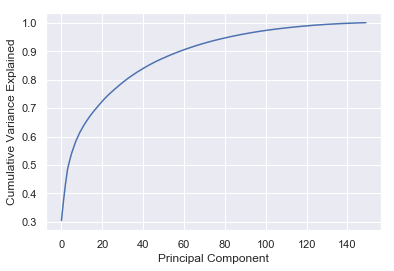

In [10]:
cumVar = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumVar)
plt.ylabel("Cumulative Variance Explained")
plt.xlabel("Principal Component")

In [11]:
# Keep only the principal components that cumulatively explain at 90% of the variance
imptPCs = pcs[:len(cumVar[cumVar <= .9])]
principalComponentDf = principalComponentDf.loc[:, imptPCs]
#principalComponentDf.head()

In [12]:
# For visualization keep 2 principal components
print(pca.explained_variance_ratio_[0:2]) #variance explained by first two PCs

#x = ctdf.loc[:, ~ctdf.columns.isin(['SubjectId', 'Age'])]
firstTwoPCs = pd.DataFrame(data = pca.components_[:,:2], columns = ['PC1', 'PC2'])
pcScores = pd.DataFrame(data = np.dot(x, firstTwoPCs), columns = ['PC1', 'PC2'])
ages = ctdf.loc[:,['Age']].reset_index()
pcScores = pd.concat([pcScores,ages['Age']], axis = 1)
pcScores.head()


[0.30559208 0.06922248]


,PC1,PC2,Age
0,-0.322038,0.122647,1.0
1,0.354158,0.225657,1.0
2,-0.201507,-0.529767,1.0
3,-0.221030,0.312654,1.0
4,-0.301707,-0.832447,1.0


C:\Users\mattbeze\Anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,


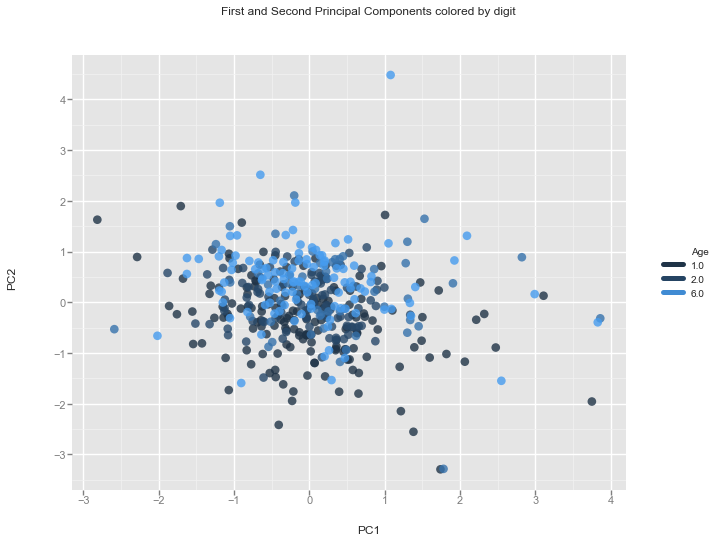

<ggplot: (20765921)>

In [13]:
from ggplot import * 
#from ggplot import scale_fill_brewer

chart = ggplot( pcScores, aes(x='PC1', y='PC2', color='Age') ) \
        + geom_point(size=75,alpha=0.8) \
        + ggtitle("First and Second Principal Components colored by digit")
chart

In [14]:
import time

from sklearn.manifold import TSNE

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(features.values)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 432 / 432
[t-SNE] Mean sigma: 1.186155
[t-SNE] Error after 100 iterations with early exaggeration: 0.960448
[t-SNE] Error after 175 iterations: 0.976725
t-SNE done! Time elapsed: 8.53999996185 seconds


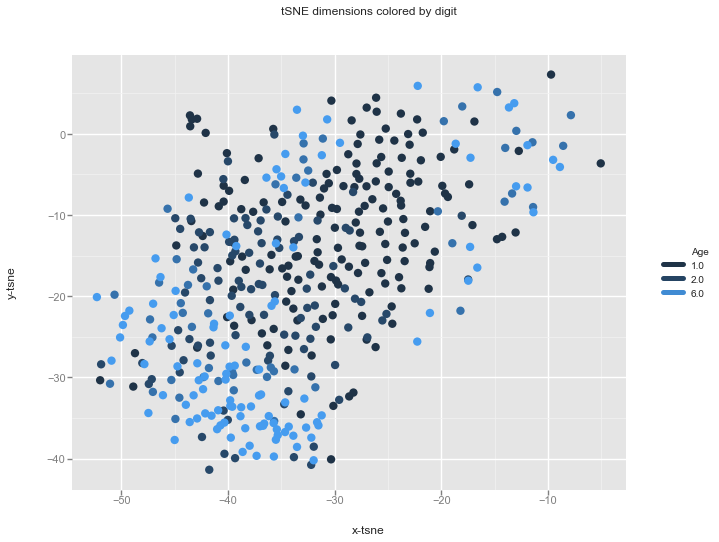

<ggplot: (26734508)>

In [15]:
df_tsne = ctdf.copy()
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]

chart = ggplot( df_tsne, aes(x='x-tsne', y='y-tsne', color='Age') ) \
        + geom_point(size=70,alpha=1.0,) \
        + ggtitle("tSNE dimensions colored by digit")
chart